---------------
## Time Series Data - Day9 HW

**Idea from DATAQUEST** 
- Author = Jennifer Walker
- Environmental scientist / data geek / Python evangelist.

Open Power System Data (OPSD) for Germany:

Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). The columns of the data file are:

- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh

Below I have added some prompts to lead you through the timeseries analysis.


Your final notebooks should:

- [ ] Be a completely new notebook with just the Day9 stuff in it NO YOU TRY: Read in the data, make the plots. Make sure to discuss what you see and comment on why your plots are great!
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

**Remember to Proof Read and Proof Run your code** Restart the kernel and go through it all once before submitting.

In [21]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

In [22]:
df = pd.read_csv('data/opsd_germany_daily.csv', parse_dates = True, index_col=0)
df

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [11]:
#Finding the name of the variables to avoid mispelling
df.keys()

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [13]:
#Checking the index of the data, this will come in handy later for the data. 
df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

## Data Basics and Preparation

Here you get some basic familiarity with the data:

- run stats on each of the variables
- count nans in each column
- look at the data types
- double check that you understand the variables and their units
- what is the date range and frequency
- add columns to the data set: Year, Month, and Weekday Name

## Running Statistics

In [19]:
#Running basic statistics on the data to see the overall average, maximum, and minimum for each of the categories. 
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


## Counting NaN's 

In [21]:
#Counting the number of NA's in order to count how many NA's there are for each of the columns
df['Consumption'].isna().sum()

0

In [17]:
df['Wind'].isna().sum()

1463

In [18]:
df['Solar'].isna().sum()

2195

In [20]:
df['Wind+Solar'].isna().sum()

2196

In [23]:
df.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

# Date range and frequency 

In [24]:
#Here we are wanting to find the date range and how often it occurs in the data set.
#This is done with upsampling in order for us to be able to see years, months or days.
cols = ['Consumption','Wind','Solar','Wind+Solar']
sample = df[cols].resample('YE')
sample

In [26]:
#This is showing us the average amount of each of the 4 categories by the year. 
sample.mean()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-12-31,1339.913797,NaN,NaN,NaN
2007-12-31,1360.635197,NaN,NaN,NaN
2008-12-31,1354.018787,NaN,NaN,NaN
2009-12-31,1259.554597,NaN,NaN,NaN
2010-12-31,1338.599178,98.388430,NaN,NaN
2011-12-31,1328.257770,120.969646,NaN,NaN
2012-12-31,1282.991131,125.307833,76.194896,201.502730
2013-12-31,1269.416036,129.309129,81.431901,211.287722
2014-12-31,1381.273482,140.405692,89.527017,230.305254


In [37]:
cols = ['Consumption','Wind','Solar','Wind+Solar']
sample = df[cols].resample('D')
sample

In [50]:
#This is showing us the average amount of each of the 4 categories by the day. 
sample.mean()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,1461.442065,NaN,NaN,NaN
2006-02-28,1467.106893,NaN,NaN,NaN
2006-03-31,1418.649161,NaN,NaN,NaN
2006-04-30,1275.058900,NaN,NaN,NaN
2006-05-31,1253.488484,NaN,NaN,NaN
...,...,...,...,...
2017-08-31,1291.283022,177.412839,148.477677,325.890516
2017-09-30,1335.952031,209.591000,102.643033,312.234033
2017-10-31,1366.297385,402.583774,68.727645,471.311419


In [46]:
cols = ['Consumption','Wind','Solar','Wind+Solar']
sample = df[cols].resample('ME')
sample

In [57]:
#This is showing us the average amount of each of the 4 categories by the Month. 
#This will be important for visualizations later to check if the season, day of the week or time during the year effects the weather. 
sample.mean()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,1461.442065,NaN,NaN,NaN
2006-02-28,1467.106893,NaN,NaN,NaN
2006-03-31,1418.649161,NaN,NaN,NaN
2006-04-30,1275.058900,NaN,NaN,NaN
2006-05-31,1253.488484,NaN,NaN,NaN
...,...,...,...,...
2017-08-31,1291.283022,177.412839,148.477677,325.890516
2017-09-30,1335.952031,209.591000,102.643033,312.234033
2017-10-31,1366.297385,402.583774,68.727645,471.311419


## Add columns to the data set: Year, Month, and Weekday Name

In [54]:
#To allow for better organization and seperation of each of the categories within the date, we create seperate columns for year,month, weekday, date, and day.
#This will come in handy when we are wanting to check how the day of the week effects the data.
df['year'] = df.index.year
df['month'] = df.index.month
df['Weekday'] = df.index.day_name()
df['Date'] = df.index.date
df['Day'] = df.index.day_of_week
df

,Consumption,Wind,Solar,Wind+Solar,year,month,Weekday,Date,Day
Date,,,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday,2006-01-01,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday,2006-01-02,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday,2006-01-03,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday,2006-01-04,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday,2006-01-05,3
...,...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,2017-12-27,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,2017-12-28,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,2017-12-29,4


## Data Exploration - Basic Visualization

Start to make plots and see if you can generate some questions about the data. Make sure that you make observations about each plot - say what you see and what it means in terms of the data.

- Plot the overall consumption over time.
- Plot the wind and solar consumption over time.

- Choose a focal year and redo the plots to look at variability over the year.
- Redo this for a focal month

# Plot the overall consumption over time.

<Axes: xlabel='year'>

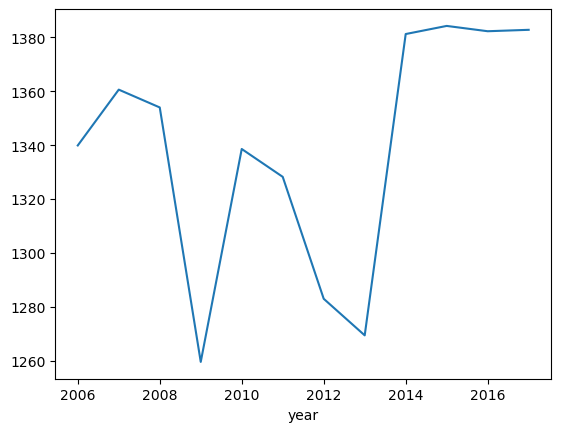

In [70]:
#Here we are grouping the consumption column by the year and finding the average.
year_consum = df['Consumption'].groupby(by=df['year']).mean()
year_consum.plot()

In this plot, we are looking at the overall data for consumption based on the data. Based on intial observation of the data we know that consumption is measured in Gwh. We see in 2006 to just a little before 2008 that consumption increased. Near 2008 through 2009 there is a sharp drop meaning that a lot of companies and businesses did not use a lot of energy. Graphs then rise from 2009 to 2010, coming out of this period of not using energy to moderately using more. From 2010 through 2013, the amount of consumption fluctuates. Consumption from 2010 through 2011 is steady and then from 2011 through 2013 there is a sharp drop again. From 2013 through 2015 consumption increases drastically and peaks in 2014. From 2014 onwards energy consumption remains steady.

- Plot the wind and solar consumption over time.

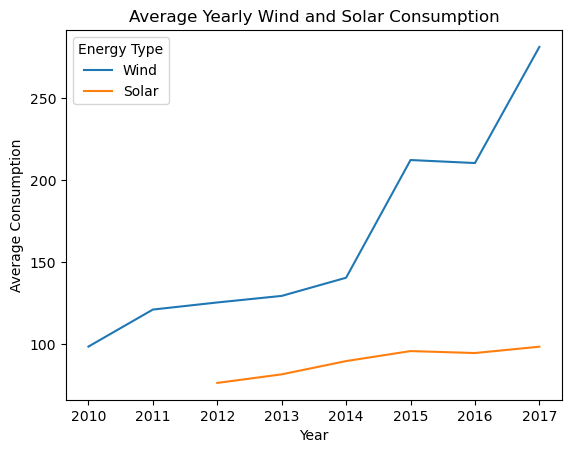

In [68]:
#Here we are taking each of the columns from the data frame and grouping them by the year. This is so we can see the average yearly consumption for each of the columns.
wind_consum = df['Wind'].groupby(by= df['year']).mean()
solar_consum = df['Solar'].groupby(by=df['year']).mean()
wind_consum.plot(label = 'Wind')
solar_consum.plot(label = 'Solar')
plt.legend(title='Energy Type')
plt.xlabel('Year')
plt.ylabel('Average Consumption')
plt.title('Average Yearly Wind and Solar Consumption')
plt.show()

This graph shows us that wind consumption grows at a much more consistent rate compared to Solar consumption. From 2010 - 2014, wind consumption increased in 2011 but experienced consistent flow up to 2014. After 2014, consumption increased rapidly up to 210 Gigawatts. The wind graph peaks at 2017 at over 250 Gigawatts consumed. Solar consumption also rose but its growth was much more gradual than wind consumption. Consumption increased from 2010 and peaked in 2015 but never rose above 90 Gigawatts. Due to wind experiencing sharper rises, users can conclude that Wind is the more dominant contributor. 

In [116]:
df.keys()

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'year', 'month',
       'Weekday', 'Date'],
      dtype='object')

In [74]:
df.loc['2017']

,Consumption,Wind,Solar,Wind+Solar,year,month,Weekday,Date,Day
Date,,,,,,,,,
2017-01-01,1130.41300,307.125,35.291,342.416,2017,1,Sunday,2017-01-01,1
2017-01-02,1441.05200,295.099,12.479,307.578,2017,1,Monday,2017-01-02,2
2017-01-03,1529.99000,666.173,9.351,675.524,2017,1,Tuesday,2017-01-03,3
2017-01-04,1553.08300,686.578,12.814,699.392,2017,1,Wednesday,2017-01-04,4
2017-01-05,1547.23800,261.758,20.797,282.555,2017,1,Thursday,2017-01-05,5
...,...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,2017-12-27,27
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,2017-12-28,28
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,2017-12-29,29


# Choose a focal year and redo the plots to look at variability over the year.

<Axes: xlabel='Month', ylabel='Average output'>

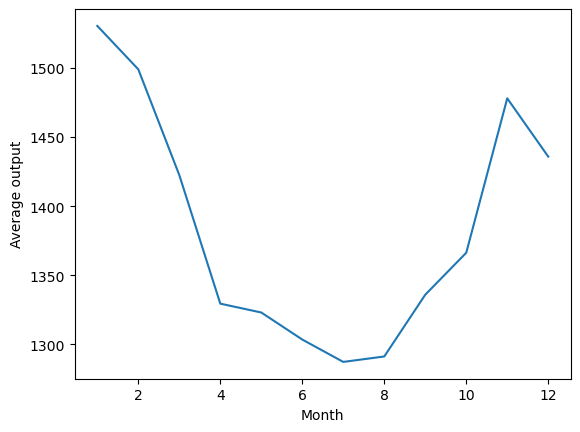

In [75]:
#This code is running us through a series of commands to find the mean for the year 2017.
#The to_datetime command is taking the 'Date' column within the dataframe and is coverting each date into the proper datetime format.
#After this we are taking the date column and and only looking for year. We are setting this condition equal to 2017. 
#The last command is the most important as its taking the year of 2017 and find the average amount of consumption throughout the year for each month.
df['Date'] = pd.to_datetime(df['Date'])
year_2017 = df[df['Date'].dt.year == 2017]
year_2017.groupby(year_2017['Date'].dt.month)['Consumption'].mean().plot(
    xlabel = 'Month',
    ylabel = 'Average output'
)


Based on the results of the graph we can see that consumption was the highest in January at over 1500 Gigawatts consumed and drastically dropped down to around 1330 Gigawatts in April. Such high consumption makes sense in January because this is when most individuals would need service like heaters in Germany due to the Winter season. From April up into the summer months, Gigawatts hit a low of 1250. This is an interesting observation as summertime is when most individuals would normally use electricity and this point for Germany is the lowest. After this, rates then shot up from August to Novemeber where consumption hit a peak of 1480 Gigawatts consumed. 

# Redo this for a focal month

<Axes: xlabel='day', ylabel='Average output'>

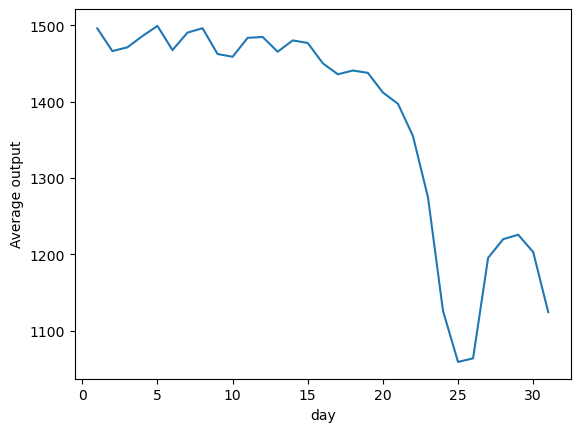

In [89]:
#Here we are doing the same thing as the command above however instead of looking for the year we are just looking for a specific month.
df['Date'] = pd.to_datetime(df['Date'])
month_dec = df[df['Date'].dt.month == 12]
month_dec.groupby(month_dec['Date'].dt.day)['Consumption'].mean().plot(
    xlabel = 'day',
    ylabel = 'Average output')

Based on the graph we can see the consumption throughout the month of Decemeber. From the 1st of the month to the 15th, consumption continously fluctuates from 1500 to 14500. After this the graph shoots down to 1000 Gigawatts on the 24. After the 24th there is a small rebound near the 26th through the 30 of 1210. From the results of this graph, we can conclude that energy consumption throughout the month of Decemeber is high during the beginning of the year and is the lowest near the end of the month. This can be a result of workplaces shutting down due to Holidays. 

## Further Exploration

Now continue exploring the data to see what you can find out. Remember to explain what you are learning from each graph or calculation. Add guiding words in markdown to talk about what your code should be doing and why.

- How does seasonality effect the energy consumption? Consider the consumption grouped on a monthly basis. You could look at max, min, mean, etc. Make an interesting plot of this data (bar plot, box plot, etc). What do you learn?

- How does the day of the week change energy consumption?

- Using downsampling, plot on the same graph the daily (original data) and the average weekly (downsampled data) consumption for both solar and wind.

- Using downsampling plot the yearly rolling average of both wind and solar consumption.

- See if you can come up with a really cool graph of your own!

# Summer min plots 

In [80]:
#First example, we are going to mask the data by the four seasons 
#Summer June (6) ,July(7), and August(8)
#Fall- September(9), October(10), and November(11) 
#Winter - December(12),January(1),February(2) 
#Spring - march(3), April(4),May(5)

#Summer first 
df['Date'] = pd.to_datetime(df['Date']) 
summer_season = df[df['Date'].dt.month.isin([6,7,8])]
summer_season.groupby(summer_season['Date'].dt.month)['Consumption'].describe()

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
6,360.0,1263.169508,146.373286,862.577,1144.15625,1316.7520,1384.50825,1459.289
7,372.0,1266.701788,139.041736,890.208,1153.57550,1319.2925,1370.43000,1470.200
8,372.0,1249.991327,130.969571,927.762,1137.67400,1291.9025,1351.55900,1434.052


<Axes: title={'center': 'Minimum consumption during summer months'}, xlabel='Month', ylabel='Minimum Consumption'>

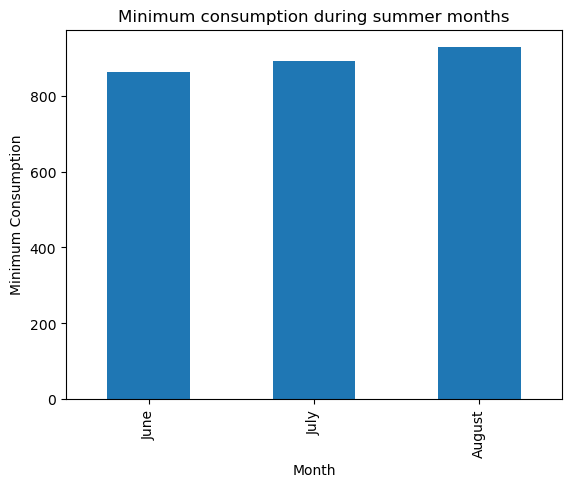

In [144]:
#This code is using the dt.month.isin[6,7,8] in order to filter the months of summer
df['Date'] = pd.to_datetime(df['Date']) 
summer_season = df[df['Date'].dt.month.isin([6,7,8])]

data_plot = (summer_season.groupby(summer_season['Date'].dt.month)['Consumption'].min())
data_plot.index = data_plot.index.map({6: 'June', 7: 'July', 8: 'August'})
data_plot.plot(kind='bar', xlabel='Month', ylabel='Minimum Consumption', 
               title='Minimum consumption during summer months')


Based on this bar graph we can observe that June has the lowest minimum consumption out of the three months. July is the second month with the lowest minimum consumption. August has the highest lowest minimum consumption which draws reasonable conclusion that the demand for more cooling services demanded as the summer went on. The graphs gradually rise as the summer months go on but August has the highest as this month is most likely the hottest. 

In [84]:
df['Date'] = pd.to_datetime(df['Date']) 
summer_season = df[df['Date'].dt.month.isin([9,10,11])]
summer_season.groupby(summer_season['Date'].dt.month)['Consumption'].describe()

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
9,360.0,1314.348716,136.621594,986.187,1188.87425,1373.0715,1415.81275,1501.586
10,372.0,1351.406597,143.239327,1027.417,1226.12075,1412.5855,1463.85808,1543.672
11,360.0,1425.192193,144.263646,1079.007,1299.08900,1477.7535,1533.44000,1644.873


<Axes: title={'center': 'Minimum consumption during Fall months'}, xlabel='Month', ylabel='Minimum Consumption'>

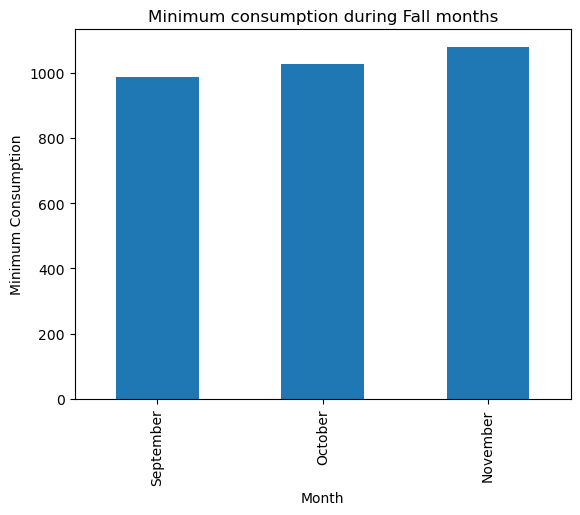

In [164]:
#This code is using the dt.month.isin[9,10,11] in order to filter the months of summer
df['Date'] = pd.to_datetime(df['Date']) 
fall_season = df[df['Date'].dt.month.isin([9,10,11])]

data_plot = (fall_season.groupby(fall_season['Date'].dt.month)['Consumption'].min())
data_plot.index = data_plot.index.map({9: 'September', 10: 'October', 11: 'November'})
data_plot.plot(kind='bar', xlabel='Month', ylabel='Minimum Consumption', 
               title='Minimum consumption during Fall months')


Based on the bar graph, this graph produces similar results to the summer seasons. Septemeber is the month with the lowest minimum consumption. Minimum consumption is close to exactly 1000 Gigawatts.  October is the second month with the lowest minimum consumption at a little over 1,000 Gigawatts. November is the month with the higest minimum consumption at 1,500 Gigawatts. Based on the seasons, this would make sense due to November being the start of Winter and individuals are starting to use more heating services due to the cold weather. There is an upward trend from Septemeber up to November.

In [88]:
df['Date'] = pd.to_datetime(df['Date']) 
summer_season = df[df['Date'].dt.month.isin([12,1,2])]
summer_season.groupby(summer_season['Date'].dt.month)['Consumption'].describe()

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
1,372.0,1433.781435,161.744962,906.910,1325.462750,1476.6050,1563.85850,1682.002
2,339.0,1452.463841,140.682177,1086.743,1357.255500,1503.4510,1563.98600,1651.314
12,372.0,1374.364568,188.988719,899.827,1216.345992,1394.5325,1545.30475,1709.568


<Axes: title={'center': 'Minimum consumption during Winter months'}, xlabel='Month', ylabel='Minimum Consumption'>

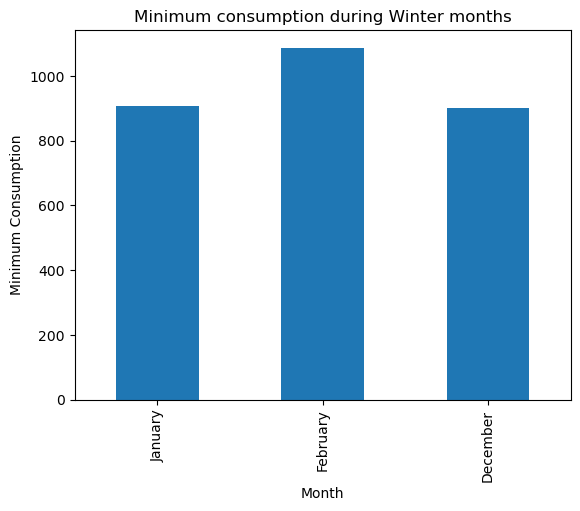

In [166]:
#This code is using the dt.month.isin[6,7,8] in order to filter the months of summer
df['Date'] = pd.to_datetime(df['Date']) 
winter_season = df[df['Date'].dt.month.isin([12,1,2])]

data_plot = (winter_season.groupby(winter_season['Date'].dt.month)['Consumption'].min())
data_plot.index = data_plot.index.map({12: 'December', 1: 'January', 2: 'February'})
data_plot.plot(kind='bar', xlabel='Month', ylabel='Minimum Consumption', 
               title='Minimum consumption during Winter months')


Based on the results from the graph, the month with the higest lowest minimum consumption is the month of February at over 1,000 Gigawatts. January is the second month with highest lowest minimum consumption at around 900 consumotion. December is the month with the lowest minimmum consumption at just under 900 Gigawatts. Overall from the graph, we can conclude that winter months show high baseline consumption levels. 

In [92]:
df['Date'] = pd.to_datetime(df['Date']) 
summer_season = df[df['Date'].dt.month.isin([3,4,5])]
summer_season.groupby(summer_season['Date'].dt.month)['Consumption'].describe()

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
3,372.0,1380.694497,146.327248,1002.856,1280.32825,1421.299,1500.33325,1581.822
4,360.0,1298.457644,158.609557,842.395,1161.04800,1358.798,1431.11025,1531.944
5,372.0,1261.905065,157.969471,853.302,1110.94750,1320.894,1393.57025,1487.176


<Axes: title={'center': 'Minimum consumption during Spring months'}, xlabel='Month', ylabel='Minimum Consumption'>

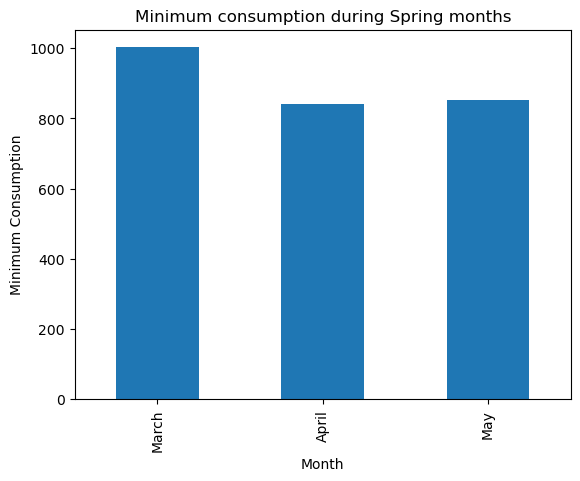

In [168]:
#This code is using the dt.month.isin[3,4,5] in order to filter the months of summer
df['Date'] = pd.to_datetime(df['Date']) 
spring_season = df[df['Date'].dt.month.isin([3,4,5])]

data_plot = (spring_season.groupby(spring_season['Date'].dt.month)['Consumption'].min())
data_plot.index = data_plot.index.map({3: 'March', 4: 'April', 5: 'May'})
data_plot.plot(kind='bar', xlabel='Month', ylabel='Minimum Consumption', 
               title='Minimum consumption during Spring months')


Based on this graph March is the month with the highest lowest minimum consumption at 1,000 Gigawatts. This suggest that energy consumption is higher nearer the start of the season. April shows us a significant drop from March, likely showing cases of mild weather and reduction of needs of service. May is similar to that of April but with a slight increase, indicating that the weather remains stable throughout the year. 

In [179]:
df.keys()

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'year', 'month',
       'Weekday', 'Date', 'Day'],
      dtype='object')

In [181]:
df

,Consumption,Wind,Solar,Wind+Solar,year,month,Weekday,Date,Day
Date,,,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday,2006-01-01,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday,2006-01-02,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday,2006-01-03,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday,2006-01-04,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday,2006-01-05,3
...,...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,2017-12-27,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,2017-12-28,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,2017-12-29,4


# How does the day of the week change energy consumption?

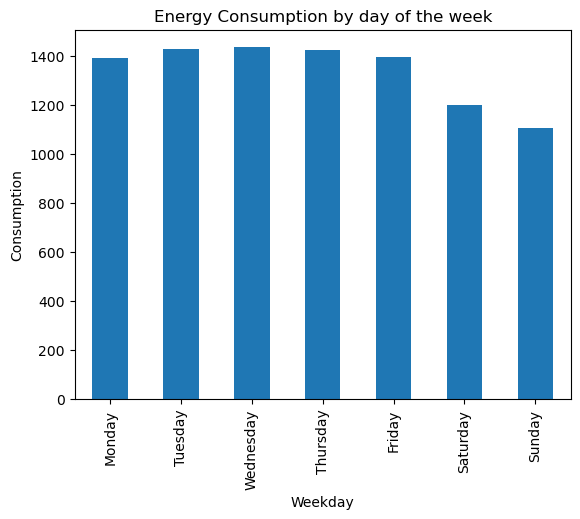

In [185]:
#This code is used to create a bargraph to look at energy consumption by the day of the week. This will tell us how much data we are using for each day of the week
df['Date'] = pd.to_datetime(df['Date'])
df['Weekday'] = df['Date'].dt.day_name()
weekday_consumption = df.groupby('Weekday')['Consumption'].mean()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_consumption = weekday_consumption.reindex(weekday_order)
weekday_consumption.plot(kind='bar', title='Energy Consumption by day of the week', ylabel='Consumption')
plt.show()

This graph shows us energy consumption for everyday throughout the week. Off of initial glance we can see that energy consumption is highest from Monday- Friday throughout the week. Based off of the days of the week Tuesday,Wednesday and Thursday are the days with the higheset energy consumption. Friday is when the week begins to drop, leaving Sunday with the lowest energy consumption for the week. This graph could be a representation of businesses busiest time of the week using softwares and when they begin to gradually slow down throughout the week.

# Using downsampling, plot on the same graph the daily (original data) and the average weekly (downsampled data) consumption for both solar and wind.

<Axes: xlabel='Date'>

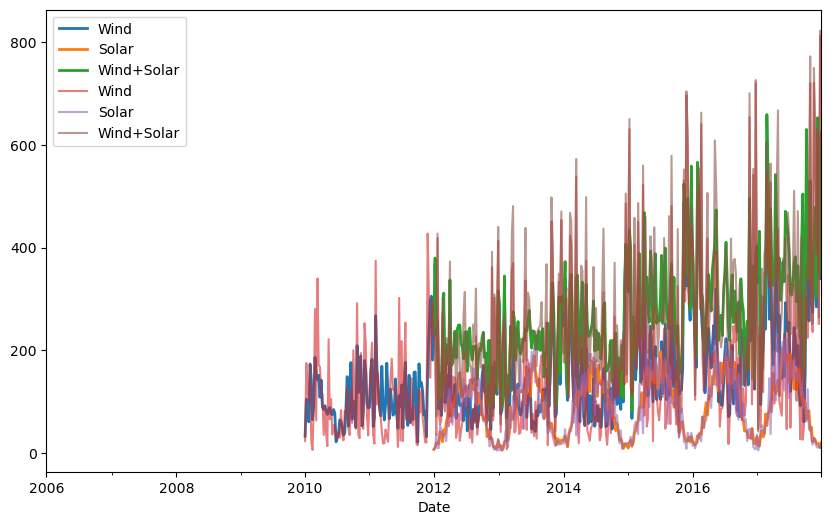

In [211]:
# This command is creatin a variable for the columns wind, solar, and wind+solar and is upsampling from weeks to days.  
cols = ['Wind', 'Solar','Wind+Solar']
weekly = df.set_index('Date')[cols].resample('W').mean()
daily = df.set_index('Date')[cols].resample('D').mean()

# I used chatgpt to help me with this command, as I did not know what ax did. ax in this scenario is being used as a single Axes object, which represents the specific plot area where datas drawn.
fig, ax = plt.subplots(figsize=(10,6))
weekly.plot(ax=ax, linewidth=2, label='Weekly Average')
daily.plot(ax=ax, alpha=0.6,label='Daily Average')


The daily and weekly energy for all three types of energy show a steady increase as time goes on. In addition to this, this graph contains many up and down dips that could represent seasonal fluctuation. We see that the wind is the line that is the most apparent due to its large fluctuations. Solar is similar however it carries smoother pattenrs compared to that of wind. A big observation that we can make from this data is that the graph carries the same shape throughout the years however it grows more as the years increase. 

# Using downsampling plot the yearly rolling average of both wind and solar consumption.

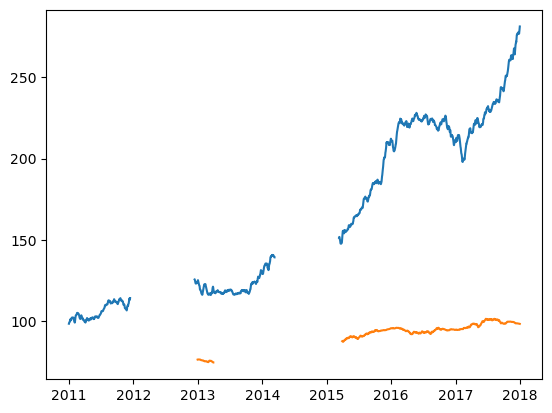

In [221]:
#Using yearly rolling average for both wind and solar consumption by setting the rolling amount to 365 to represent the year. 
wind_year_rolling = df['Wind'].rolling(365).mean()
solar_year_rolling = df['Solar'].rolling(365).mean() 
plt.plot(df['Date'],wind_year_rolling,label = 'Wind Rolling Average')
plt.plot(df['Date'],solar_year_rolling, label = 'Solar Rolling Average')

Based off of this graph, we can see an steady upward trend from 2011 to 2018. This shows us that wind energy consumption has increased over time. In 2011, wind experienced an increase from 100 to 130. After this our next big increase in wind was from 2015 to the beginning of 2017. Consumption went from a value of 150 to close to 230. Solar has increased gradually but more steadily. It was low in the year of 2013 but had its biggest rise in mid 2017 around 110.